In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [13]:

data_dir = "G:/ai_project/seg_dataset"  

# Image settings
IMG_HEIGHT = 180
IMG_WIDTH = 180
BATCH_SIZE = 32

# Data augmentation and flow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # <- Training subset
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # <- Validation subset
)


Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.


In [14]:
train_generator.class_indices


{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}

In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 118336)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [16]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    verbose=1
)

Epoch 1/50


106/106 [==============================] - 99s 926ms/step - loss: 1.4047 - accuracy: 0.4532 - val_loss: 1.3998 - val_accuracy: 0.3734
Epoch 2/50
106/106 [==============================] - 70s 657ms/step - loss: 1.0633 - accuracy: 0.5332 - val_loss: 1.1264 - val_accuracy: 0.4946
Epoch 3/50
106/106 [==============================] - 42s 400ms/step - loss: 1.0117 - accuracy: 0.5533 - val_loss: 1.1855 - val_accuracy: 0.4411
Epoch 4/50
106/106 [==============================] - 42s 401ms/step - loss: 0.9799 - accuracy: 0.5743 - val_loss: 1.1182 - val_accuracy: 0.4828
Epoch 5/50
106/106 [==============================] - 42s 394ms/step - loss: 0.9317 - accuracy: 0.5975 - val_loss: 1.0835 - val_accuracy: 0.4946
Epoch 6/50
106/106 [==============================] - 42s 393ms/step - loss: 0.8884 - accuracy: 0.6185 - val_loss: 1.2787 - val_accuracy: 0.4578
Epoch 7/50
106/106 [==============================] - 42s 392ms/step - loss: 0.8166 - accuracy: 0.6567 - val_loss: 1.1815 - val_

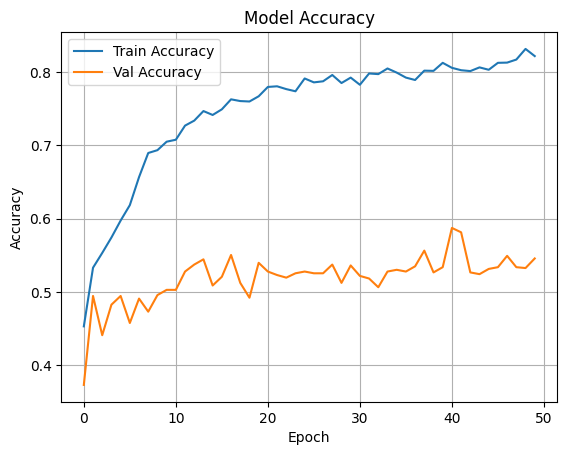

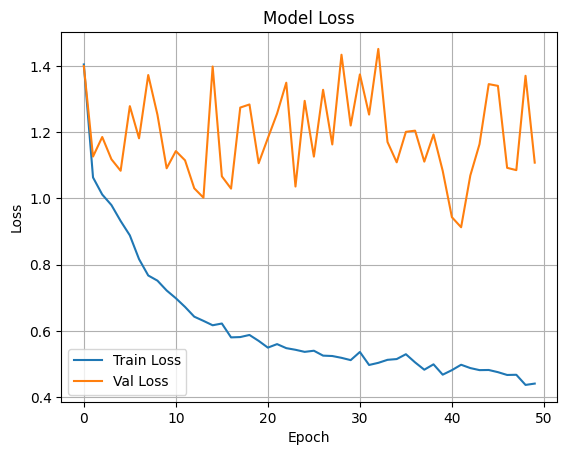

In [17]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


In [18]:

model.save("mv2_oculus.h5")
print("Model saved as mv2_oculus.h5 ✅")


C:\python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as mobilenetv2_oculus.h5 ✅


In [19]:
import os
cwd = os.getcwd()
print("Model saved here:", cwd)


Model saved here: C:\Users\sreek\OCULUS_A+
